# Project 2
### CS 5/7394 - Applied Machine Learning

- **Due** - March 11 @ 11:59 pm pushed to Github repo
- **Teams** - You can do this project solo or in pairs.  Not 3, not 4 not 5... Max of 2. If a 5394 student pairs with a 7394 student, the pair needs to do the 7394 work. 

Below are 6 Kaggle Datasets.  You will choose 1 to work with for this project. 

- [Airfare Prediction Dataset](https://www.kaggle.com/zwartfreak/airline-fare-prediction)
- [Chinese Rest Holiday Dataset](https://www.kaggle.com/holoong9291/chinese-rest-holiday-dataset-2020-to-2022)
- [Jigsaw Toxic Comment Classification Challenge](https://www.kaggle.com/julian3833/jigsaw-toxic-comment-classification-challenge?select=train.csv)
- [Latest Covid 19 Dataset Worldwide](https://www.kaggle.com/sandhyakrishnan02/latest-covid-19-dataset-worldwide)
- [Trains](https://www.kaggle.com/vahidehdashti/machinelearningdatabase-trains?select=trains-original.data)
- [Football Data top 5 Leagues](https://www.kaggle.com/sanjeetsinghnaik/football-data-top-5-leagues)

Merging disparate datasets is a staple of the data exploration process.  Therefore, for which ever data set above that you choose, you will need to independently find **an additional** dataset to merge with your selection.  The only requirement is that it add to the richness of the original dataset. Students in the 7000-level version of the class need to find two additional data sets to merge with the original selection. 

_Note_: If you want to start with a different data set, you need to get Fontenot's OK first.  

### Your Tasks

Below, there are cells that provide directions on what to do for the project.  

You can insert as many cells between the ones below as you'd like, but please **Do NOT** change the cells already provided. 

### Part 1 - Getting Started

- Import libraries
- Load original Data (which ever one you chose from the provided list) into a data frame. 
- Load your additional data set(s) into a data frame. 
- In a markdown cell, provide a brief description of your the data sets you've chosen to work with.  
- Develop a list of 3 - 4 questions that you hope to be able to answer after the exploration of the data and write them in this section. 

### Datasets being used:
- [Airfare Prediction Dataset](https://www.kaggle.com/zwartfreak/airline-fare-prediction)
- [Busiest Airports](https://en.wikipedia.org/wiki/List_of_busiest_airports_by_passenger_traffic#2019_statistics)
- [Jet Fuel Prices](https://www.indexmundi.com/commodities/?commodity=jet-fuel&months=60)

In [521]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Markdown as md

airfare_prediction = pd.read_excel('data/train.xlsx')
jet_fuel = pd.read_csv('data/jet_fuel_data.csv')
busiest_airports = pd.read_csv('data/BusiestAirports_2019.csv', encoding='utf-8')

In [522]:
airfare_prediction.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3898
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7663
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13883
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6219
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13303


**Airfare Prediction Dataset Description:**
Dataset that contains information on various flights from various airlines to help predict price of ticket.

In [523]:
jet_fuel.head()

,Date,Price,Change
0,Feb-17,1.55,-
1,Mar-17,1.45,-6.59%
2,Apr-17,1.51,4.50%
3,May-17,1.41,-6.49%
4,Jun-17,1.30,-8.29%


**Busiest Airports Dataset Description:**
Dataset that uses the total number of passengers that pass through an airport to determine the ranking for busiest airports.

In [524]:
busiest_airports.head()

,Rank,Airport,Location,Country,Code(IATA/ICAO),Total Passengers
0,1,Hartsfield-Jackson Atlanta International Airport,"Atlanta, Georgia",United States,ATL/KATL,"110,531,300"
1,2,Beijing Capital International Airport,"Chaoyang-Shunyi, Beijing",China,PEK/ZBAA,"100,011,438"
2,3,Los Angeles International Airport,"Los Angeles, California",United States,LAX/KLAX,"88,068,013"
3,4,Dubai International Airport,"Garhoud, Dubai",United Arab Emirates,DXB/OMDB,"86,396,757"
4,5,Tokyo Haneda Airport,"Ōta, Tokyo",Japan,HND/RJTT,"85,505,054"


**Jet Fuel Dataset Description:**
Dataset that outlines price of jet fuel per gallon each month starting in February 2019 and percent change from the price of the month before.

#### Questions we hope to answer:
1. What affect does the departure/arrival location have on airfare
2. What affect does the flight date/time have on airfare
3. What affect does the price of jet fuel have on airfare
3. What affect does the choice of airport have on airfare

### Part 2 - Data Inspection

Write some code to summarize the datasets.  Think about the following questions:
- What type of data is each variable? (think like a data scientist here, not a computer scientist)
- What is the total size of the data sets?
- What time boundaries are there in the dataset?  IOW, what time frame do they span?
- Are there any missing values in any of the variables? 

Do this with Intentionality.  Don't skimp. 

### Airfare Prediction Dataset
***Data Type for Each Variable:***
- Airline: object/string
- Date_of_Journey: object/string converted to datetime object
- Source: object/string
- Destination: object/string
- Route: object/string
- Dep_Time (Departing Time): object/string converted to datetime object
- Arrival_Time: object/string converted to datetime object
- Duration: object/string
- Total_Stops: object/string
- Additional Info: object/string
- Price: float
***Total Size of Data Set:*** 
- 2671 entries

***Time Boundaries:***

In [525]:
sorted_dates = pd.to_datetime(airfare_prediction["Date_of_Journey"], format = "%d/%m/%Y").sort_values().dt.date
min = sorted_dates.min()
max = sorted_dates.max()
print(str(min) + " to " + str(max))

2019-03-01 to 2019-06-27


***Missing Values:***

In [526]:
missing = airfare_prediction[airfare_prediction.isna().isnull().any(axis=1)]
missing

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price


In [527]:
airfare_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Busiest Airports in 2019
***Data Type for Each Variabe:***
- Rank: integer
- Airport: object/string
- Location: object/string
- Country: object/string
- Code(IATA/ICAO): object/string
- Totalpassengers: object/string
***Total Size of Data Set:***
- 50 entries
***Time Boundaries:***
- N/A
***Missing Values:***

In [528]:
missing = busiest_airports[busiest_airports.isna().isnull().any(axis=1)]
missing

,Rank,Airport,Location,Country,Code(IATA/ICAO),Total Passengers


In [529]:
busiest_airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              50 non-null     int64 
 1   Airport           50 non-null     object
 2   Location          50 non-null     object
 3   Country           50 non-null     object
 4   Code(IATA/ICAO)   50 non-null     object
 5   Total Passengers  50 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.5+ KB


### Jet Fuel Dataset
***Data Type for Each Variable:***
- Month: object/string
- Price: object/string
- Change: object/string
***Total Size of Data Set:***
- 60 entries

***Time Boundaries:***

In [530]:
sorted_dates = pd.to_datetime(jet_fuel["Date"], format = "%b-%y").sort_values().dt.date

min = str(sorted_dates.min().month) + "-" + str(sorted_dates.min().year)
max = str(sorted_dates.max().month) + "-" + str(sorted_dates.max().year)
print(min + " to " + max)

2-2017 to 1-2022


***Missing Values:***

In [531]:
missing = jet_fuel[jet_fuel.isna().isnull().any(axis=1)]
missing

,Date,Price,Change


In [532]:
jet_fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    60 non-null     object 
 1   Price   60 non-null     float64
 2   Change  60 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.5+ KB


### Part 3 - Data Description

- Create a data description (data dictionary) for your data sets.
    - Describe each variable
    - If categorical, what levels are present? If the levels are encoded, what do the codes mean?
    - If numeric, provide min, max, median and any other univariate stats you'd like to add in. 
- Where appropriate, provide histograms or other visualizations to characterize each variable. 

### Airfare Prediction Dataset
| Variable Name | C/N | Description |
| :-----------: | :-: | ----------- |
| Airline | Categorical | The name of the airline carrier, if multiple value = "Multiple carriers" |
| Date_of_Journey | Categorical | Date of the departure time (dd/mm/yyyy) |
| Source | Categorical | The flight's city of departure |
| Destination | Categorical | The flight's city of arrival |
| Route | Categorical | List of airport stops in order |
| Dep_Time | Categorical | Time of departure (24 hour format) |
| Arrival_Time | Categorical | Time of arrival (24 hour format) |
| Duration | Categorical | Length of flight in hours and minutes |
| Total_Stops | Categorical | Number of stops made in the flight, if 0 value is "non-stop" |
| Additional_Info | Categorical | Other information needed to be listed |
| Price | Numerical | Price of ticket |

### Busiest Airports
| Variable Name | C/N | Description |
| :-----------: | :-: | ----------- |
| Rank | Categorical | Order of airport by level of busyness |
| Airport | Categorical | Full name of the airport |
| Code (IATA/ICAO) | Categorical | Airport codes for the International Air Transport Association (IATA) and the Internation Civil Aviation Organization (ICAO) |
| Location | Categorical | Where the airport is located |
| Country | Categorical | Country the airport is in |
| Dep_Time | Categorical | Time of departure (24 hour format) |

### Jet Fuel
| Variable Name | C/N | Description |
| :-----------: | :-: | ----------- |
| Month | Categorical | Month and Year of when the data was taken |
| Price | Numerical | How much jet fuel costs per gallon |
| Change | Numerical | Percent change of jet fuel price from the month before |

In [533]:
# Getting min, max, median of price and change
jet_fuel_norm = jet_fuel[jet_fuel.Change != "-"]
jet_fuel_chg = jet_fuel_norm['Change'].str.rstrip('%').astype('float') / 100.0
c_min = jet_fuel_chg.min()
c_max = jet_fuel_chg.max()
c_median = jet_fuel_chg.median()

p_min = jet_fuel_norm["Price"].min()
p_max = jet_fuel_norm["Price"].max()
p_median = jet_fuel_norm["Price"].median()

md("| Variable Name | Min | Max | Median |\n" + 
   "| :-----------: | :-: | :-: | :----: |\n" + 
   "| Change | {} | {} | {} |\n".format(c_min, c_max, c_median) + 
   "| Price | {} | {} | {} |".format(p_min, p_max, p_median))

| Variable Name | Min | Max | Median |
| :-----------: | :-: | :-: | :----: |
| Change | -0.3685 | 0.4329 | 0.032400000000000005 |
| Price | 0.61 | 2.45 | 1.82 |

***Price per Month***

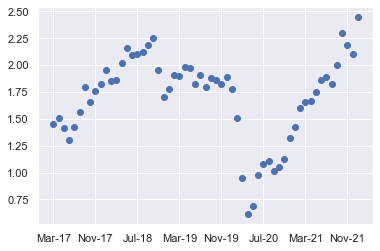

In [534]:
axes = plt.axes()
axes.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.scatter(jet_fuel_norm["Date"], jet_fuel_norm["Price"])
plt.show()

***Change per Month***

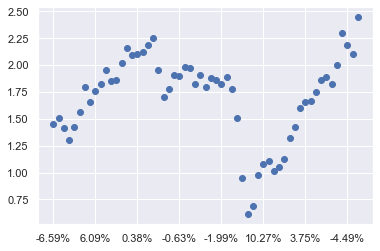

In [535]:
axes = plt.axes()
axes.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.scatter(jet_fuel_norm["Change"], jet_fuel_norm["Price"])
plt.show()

### Part 4 - Merge the data

Now that you have a better feel for each of your two (or three, for the 7394 students) data sets, it is time to merge them. Describe your strategy for merging the data sets and then actually perform the merge.  

Develop a strategy for verifying that the data is properly merged (hoping and finger-crossing are not valid strategies). 

#### description of merge and validation strategy
We will merge the additional two datasets -- jet fuel and busiest airports -- into the main dataset in similar but independent ways.<br>
For the busiest airports dataset, we will focus on the source and destination airports and merge these two datasets using two columns -- one storing the rank of the source airport and the other storing the rank of the destination airport.<br>
To merge the jet fuel dataset into the original airfare prediction dataset, we will create a new column that stores the associated jet fuel price associated with the month and year of the flight.<br>
To validate that the datasets were successfully merged, we will output the dataframe and observe a few sample datapoints

In [536]:
merged_data = airfare_prediction.copy(deep = True)

In [537]:
merged_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3898
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7663
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13883
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6219
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13303
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4108
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4146
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7230
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12649


In [538]:
merged_data['Source Airport Busyness Rank'] = ""

for sourceIndex, source in enumerate(merged_data['Source']):
    airportFound = False
    for locIndex, location in enumerate(busiest_airports['Location']):
        city = location.split(',')
        
        if source == city[0]:
            airportFound = True
            merged_data['Source Airport Busyness Rank'].iloc[sourceIndex] = busiest_airports['Rank'].iloc[locIndex]
            
    # if airport not found in dataset, set as null
    if airportFound == False:
        merged_data['Source Airport Busyness Rank'].iloc[sourceIndex] = np.nan
            

C:\Users\amory\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [539]:
merged_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price,Source Airport Busyness Rank
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3898,NaN
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7663,NaN
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13883,17
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6219,NaN
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13303,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4108,NaN
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4146,NaN
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7230,NaN
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12649,NaN


In [540]:
merged_data['Destination Airport Busyness Rank'] = ""

for sourceIndex, source in enumerate(merged_data['Destination']):
    airportFound = False
    for locIndex, location in enumerate(busiest_airports['Location']):
        city = location.split(',')
        
        if source == city[0]:
            airportFound = True
            merged_data['Destination Airport Busyness Rank'].iloc[sourceIndex] = busiest_airports['Rank'].iloc[locIndex]
            
    # if airport not found in dataset, set as null
    if airportFound == False:
        merged_data['Destination Airport Busyness Rank'].iloc[sourceIndex] = np.nan

C:\Users\amory\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [541]:
merged_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price,Source Airport Busyness Rank,Destination Airport Busyness Rank
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3898,NaN,NaN
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7663,NaN,NaN
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13883,17,NaN
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6219,NaN,NaN
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13303,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4108,NaN,NaN
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4146,NaN,NaN
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7230,NaN,17
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12649,NaN,NaN


In [542]:
merged_data['Jet Fuel Price at Date of Travel'] = ""

monthSwitcher = {
    "Jan": "01",
    "Feb": "02",
    "Mar": "03",
    "Apr": "04",
    "May": "05",
    "Jun": "06",
    "Jul": "07",
    "Aug": "08",
    "Sep": "09",
    "Oct": "10",
    "Nov": "11",
    "Dec": "12",
    }

yearSwitcher = {
    "17": "2017",
    "18": "2018",
    "19": "2019",
    "20": "2020",
    "21": "2021",
    "22": "2022"
}

for journeyDateIndex, journeyDate in enumerate(merged_data['Date_of_Journey']):
    journey_date = journeyDate.split('/')
    journey_month = journey_date[1]
    journey_year = journey_date[2]
    
    fuelPriceFound = False
    
    for fuelDateIndex, fuelDate in enumerate(jet_fuel['Date']):
        fuel_date = fuelDate.split('-')
        fuel_month = monthSwitcher[fuel_date[0]]
        fuel_year = yearSwitcher[fuel_date[1]]
        
#         print("Journey Month: ", journey_month, " Fuel Month: ", fuel_month)
#         print("Journey Year: ", journey_year, "Fuel Year: ", fuel_year)
        
        if journey_month == fuel_month and journey_year == fuel_year:
            fuelPriceFound = True
            merged_data['Jet Fuel Price at Date of Travel'].iloc[journeyDateIndex] = jet_fuel['Price'].iloc[fuelDateIndex]
            
    if fuelPriceFound == False:
        merged_data['Jet Fuel Price at Date of Travel'].iloc[journeyDateIndex] = np.nan

C:\Users\amory\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [543]:
merged_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional Info,Price,Source Airport Busyness Rank,Destination Airport Busyness Rank,Jet Fuel Price at Date of Travel
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3898,NaN,NaN,1.9
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7663,NaN,NaN,1.97
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13883,17,NaN,1.82
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6219,NaN,NaN,1.97
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13303,NaN,NaN,1.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4108,NaN,NaN,1.98
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4146,NaN,NaN,1.98
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7230,NaN,17,1.98
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12649,NaN,NaN,1.9


### Part 5 - Explore Bivariate relationships

- Choose a reasoned set of variables to explore further.  You don't have to explore all possible pairs of variables, nor do we want to grade that much.  Choose 7 - 9 variables. One should be a variable that you'd like to predict (target variable) using the others (predictor variables). 
- List your predictor variables
- List your target variable
- Briefly describe why you have chosen these. 

Use any of the available visualizations from Seaborn to explore the relationships between the variables. Explore the relationships among the predictor variables as well as the relationship between each predictor variable and the target variable.  Which of the predictor variables are most strongly related?  Are there any interesting relationships between categorical predictors and numeric predictors?  If there are any dichotomous variables, does that influence any of the relationships? Are the relationships positive or negative? 

Below each plot, you should provide a description and interpretation of the plot.  Make sure to include why the variables in that plot were chosen and what you hope the reader would gain from it as well. 

#### Variables
##### Predictors
Airline - <i>We chose to analyze the airline because some airlines are more expensive than others</i><br>
Date of Journey<br>
Source<br>
Destination<br>
Departure Time<br>
Total Stops<br>
Jet Fuel Price<br>
##### Target
Price


In [544]:
import seaborn as sns
import matplotlib.pyplot as plt

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.,  80000.,  90000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

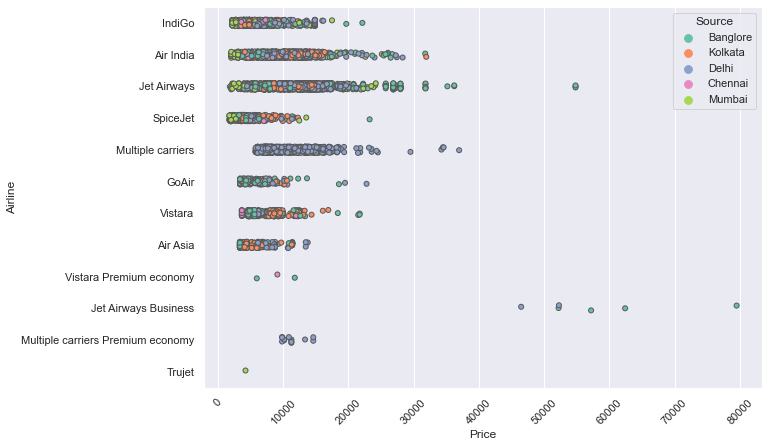

In [545]:
sns.set(rc = {'figure.figsize':(10,7)})
ax = sns.stripplot(x = "Price", y = "Airline", hue="Source", palette="Set2", data = merged_data, linewidth = 1)
plt.xticks(rotation=45)

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000.]),
 [Text(-20000.0, 0, '−20000'),
  Text(0.0, 0, '0'),
  Text(20000.0, 0, '20000'),
  Text(40000.0, 0, '40000'),
  Text(60000.0, 0, '60000'),
  Text(80000.0, 0, '80000'),
  Text(100000.0, 0, '100000'),
  Text(120000.0, 0, '120000')])

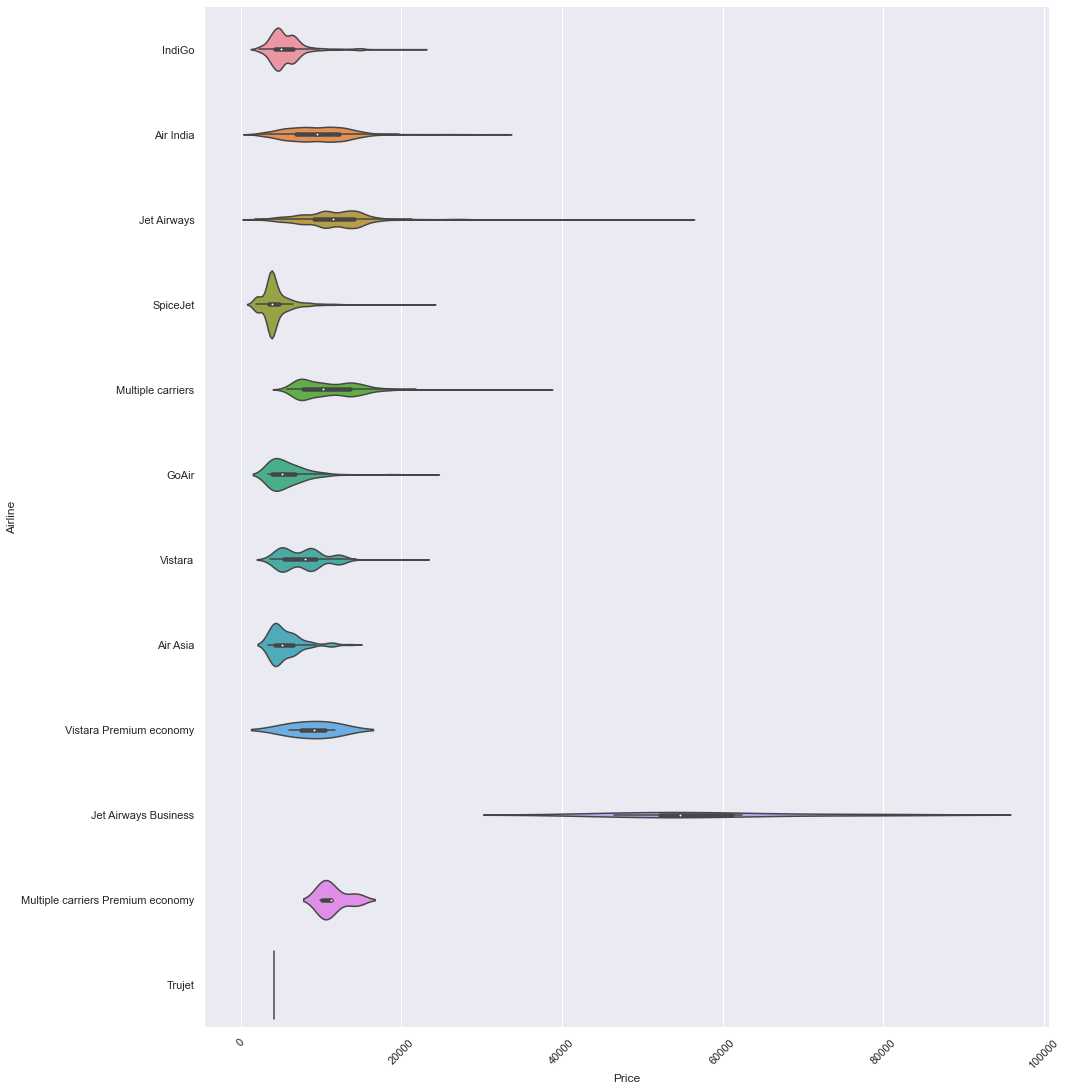

In [546]:
sns.set(rc = {'figure.figsize':(10,7)})
sns.catplot(x="Price", y="Airline", kind="violin", data=merged_data, height=15)
plt.xticks(rotation=45)

In [547]:
from datetime import datetime

for index, date in enumerate(merged_data["Date_of_Journey"]):
    merged_data["Date_of_Journey"].iloc[index] = datetime.strptime(date, '%d/%m/%Y')

C:\Users\amory\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.]),
 [Text(-20000.0, 0, '−20000'),
  Text(0.0, 0, '0'),
  Text(20000.0, 0, '20000'),
  Text(40000.0, 0, '40000'),
  Text(60000.0, 0, '60000'),
  Text(80000.0, 0, '80000'),
  Text(100000.0, 0, '100000')])

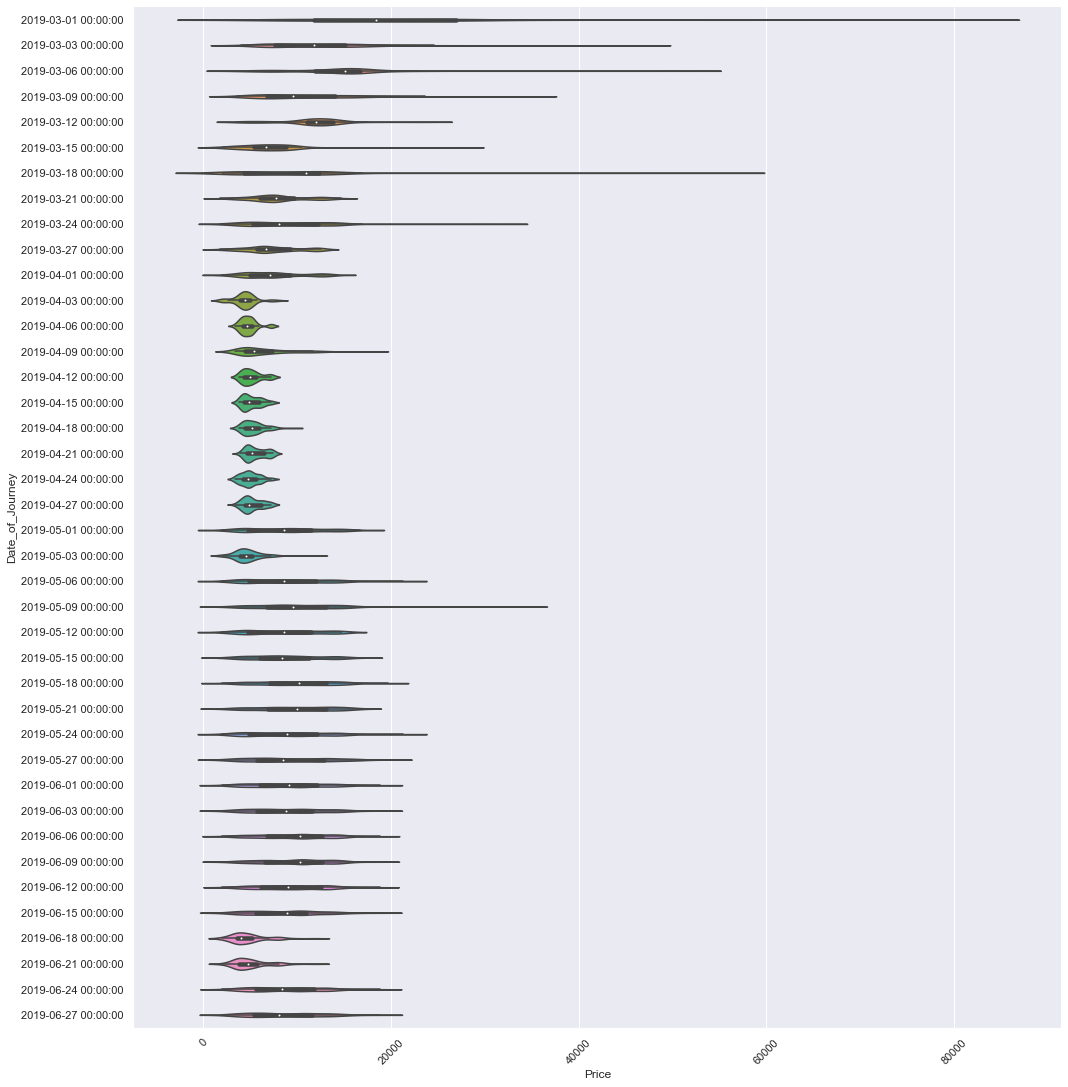

In [548]:
sns.set(rc = {'figure.figsize':(10,7)})
merged_data = merged_data.sort_values(by=['Date_of_Journey'])
sns.catplot(x="Price", y="Date_of_Journey", kind="violin", data=merged_data, height=15)
plt.xticks(rotation=45)

(array([17956., 17970., 17987., 18001., 18017., 18031., 18048., 18062.,
        18078.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

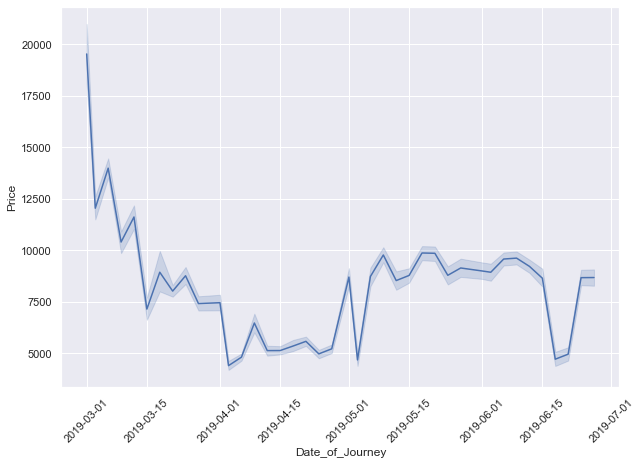

In [549]:
sns.set(rc = {'figure.figsize':(10,7)})
sns.lineplot(x="Date_of_Journey", y="Price", data=merged_data)
plt.xticks(rotation=45)

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.]),
 [Text(-20000.0, 0, '−20000'),
  Text(0.0, 0, '0'),
  Text(20000.0, 0, '20000'),
  Text(40000.0, 0, '40000'),
  Text(60000.0, 0, '60000'),
  Text(80000.0, 0, '80000'),
  Text(100000.0, 0, '100000')])

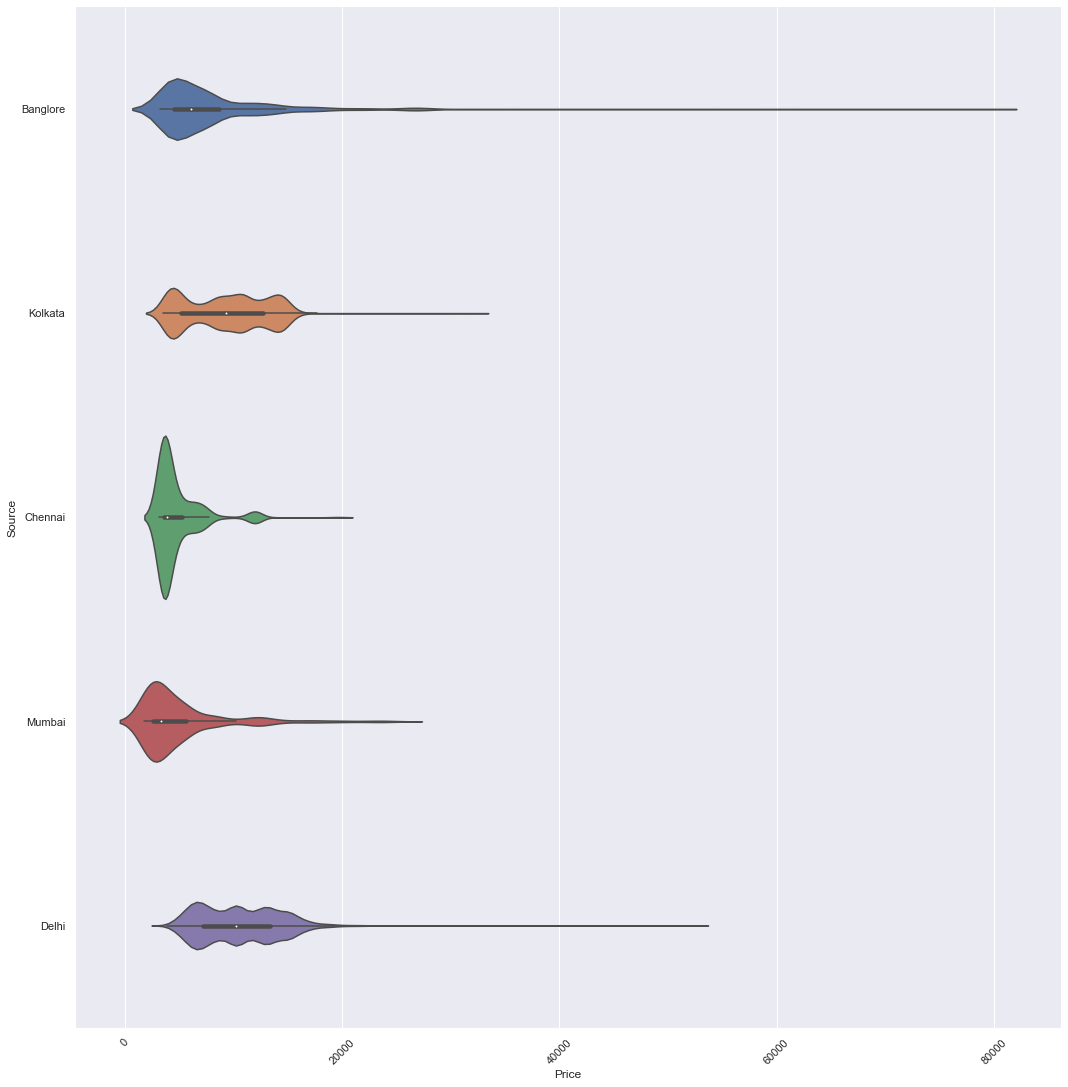

In [550]:
sns.set(rc = {'figure.figsize':(10,7)})
sns.catplot(x="Price", y="Source", kind="violin", data=merged_data, height=15)
plt.xticks(rotation=45)

(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.]),
 [Text(-20000.0, 0, '−20000'),
  Text(0.0, 0, '0'),
  Text(20000.0, 0, '20000'),
  Text(40000.0, 0, '40000'),
  Text(60000.0, 0, '60000'),
  Text(80000.0, 0, '80000'),
  Text(100000.0, 0, '100000')])

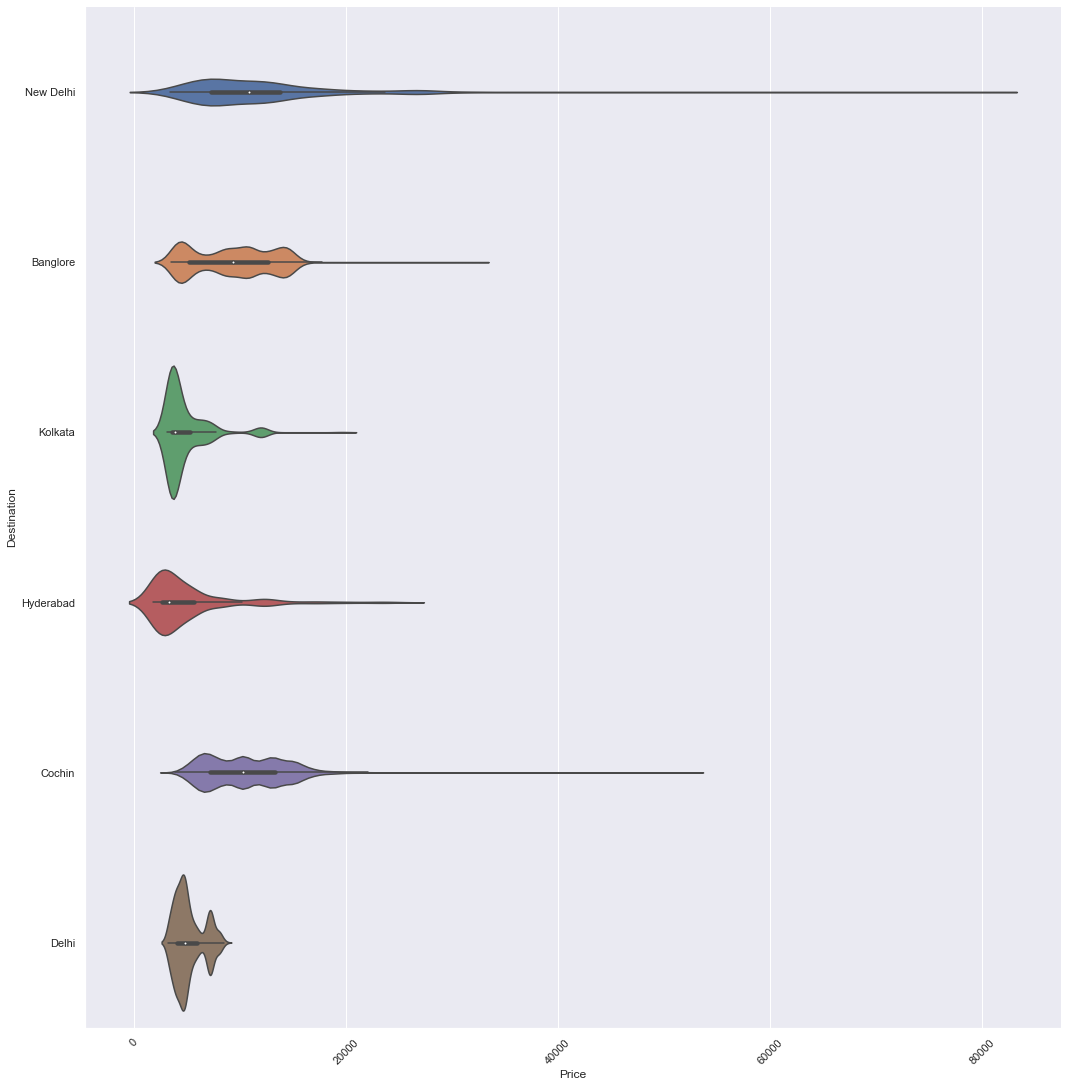

In [551]:
sns.set(rc = {'figure.figsize':(10,7)})
sns.catplot(x="Price", y="Destination", kind="violin", data=merged_data, height=15)
plt.xticks(rotation=45)

In [552]:
for index, time in enumerate(merged_data["Dep_Time"]):
    merged_data["Dep_Time"].iloc[index] = datetime.strptime(time,'%H:%M')
    
merged_data = merged_data.sort_values(by=['Dep_Time'])

C:\Users\amory\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


(array([-25567.   , -25566.875, -25566.75 , -25566.625, -25566.5  ,
        -25566.375, -25566.25 , -25566.125, -25566.   ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

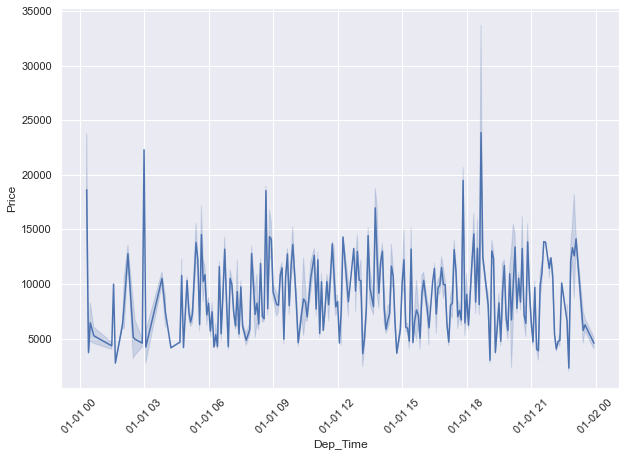

In [553]:
from datetime import time

sns.set(rc = {'figure.figsize':(10,7)})
sns.lineplot(x="Dep_Time", y="Price", data=merged_data)
plt.xticks(rotation=45)

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.,  80000.,  90000.]),
 [Text(-10000.0, 0, '−10000'),
  Text(0.0, 0, '0'),
  Text(10000.0, 0, '10000'),
  Text(20000.0, 0, '20000'),
  Text(30000.0, 0, '30000'),
  Text(40000.0, 0, '40000'),
  Text(50000.0, 0, '50000'),
  Text(60000.0, 0, '60000'),
  Text(70000.0, 0, '70000'),
  Text(80000.0, 0, '80000'),
  Text(90000.0, 0, '90000')])

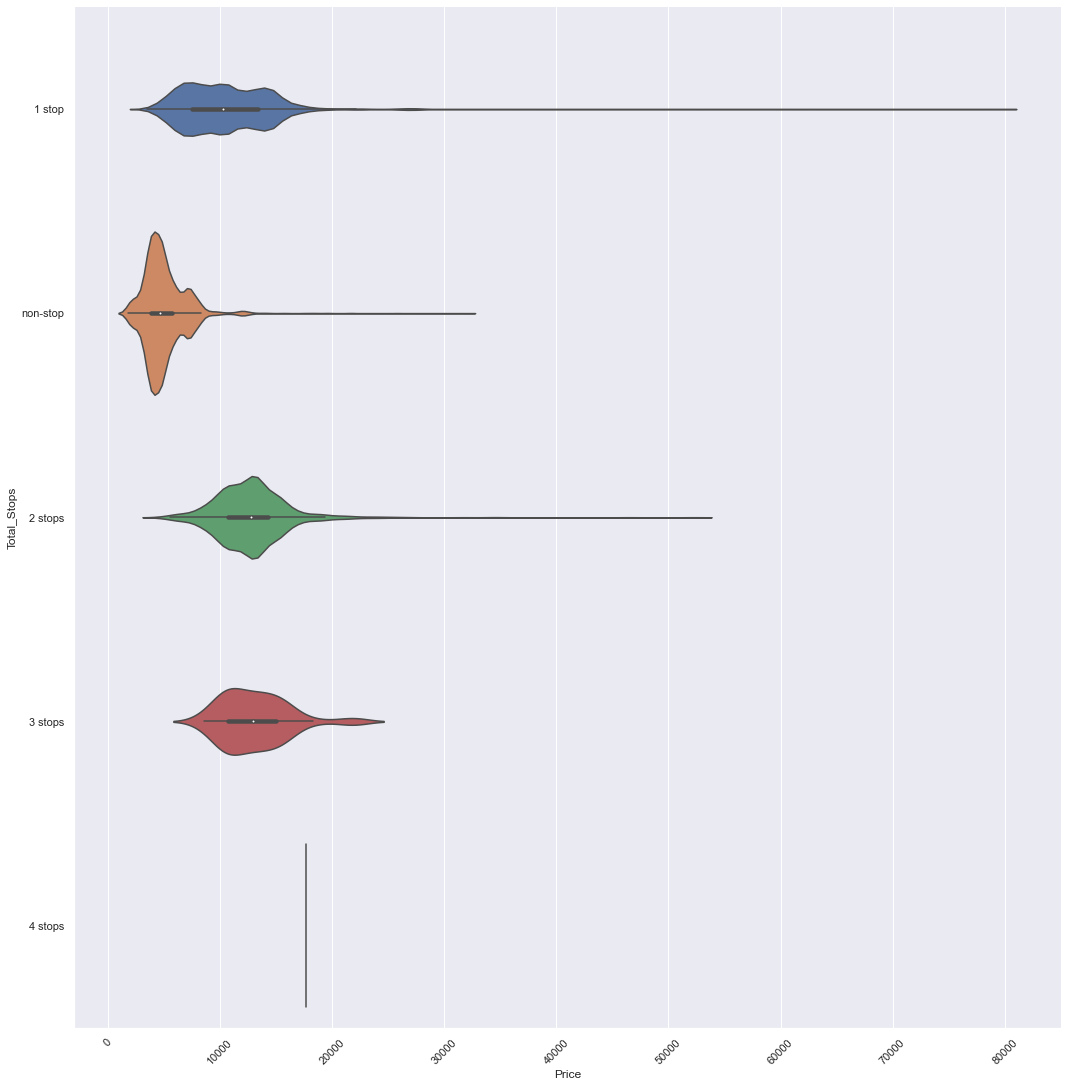

In [554]:
sns.set(rc = {'figure.figsize':(10,7)})
sns.catplot(x="Price", y="Total_Stops", kind="violin", data=merged_data, height=15)
plt.xticks(rotation=45)

<AxesSubplot:xlabel='Jet Fuel Price at Date of Travel', ylabel='Price'>

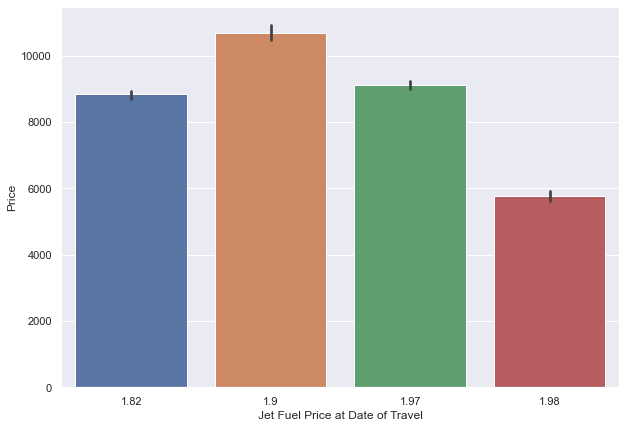

In [555]:
merged_data["Jet Fuel Price at Date of Travel"] = merged_data["Jet Fuel Price at Date of Travel"].astype('float')
sns.set(rc = {'figure.figsize':(10,7)})
sns.barplot(data=merged_data,x="Jet Fuel Price at Date of Travel",y="Price")

(array([17956., 17970., 17987., 18001., 18017., 18031., 18048., 18062.,
        18078.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

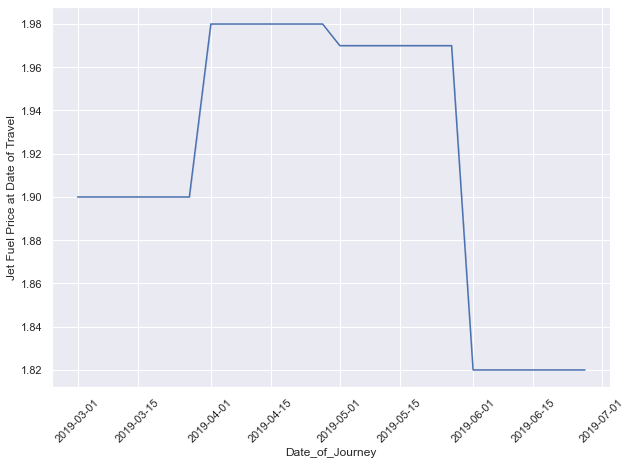

In [556]:
sns.set(rc = {'figure.figsize':(10,7)})
merged_data = merged_data.sort_values(by=['Date_of_Journey'])
sns.lineplot(x="Date_of_Journey", y="Jet Fuel Price at Date of Travel", data=merged_data)
plt.xticks(rotation=45)

In [557]:
# weekend vs weekday